# Taller Pandas

Cristian Cristancho

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

Se procede a cargar los datos del archivo .csv 

In [2]:
data_path = 'PRSA_data_2010.1.1-2014.12.31.csv'
data = pd.read_csv(data_path, index_col=0)

In [3]:
data

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [7]:
data.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


## 1. Diga qué índices serían pertienentes tener y pongalos.

Se tomara como indice a un datetime generado a partir de las columnas year, month, day y hour que quedara como indice del dataframe.

In [49]:
data['date/time'] = data['year'].astype(str) + '/' + data['month'].astype(str) + '/' + data['day'].astype(str)
data['date/time'] = pd.to_datetime(data['date/time'], format='%Y/%m/%d', errors='ignore')
data['date/time'] = data['date/time'].astype('datetime64[ns]')

In [50]:
data.set_index('date/time')

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date/time,,,,,,,,,,,,
2010-01-01,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [51]:
data['date/time'].dtype

dtype('<M8[ns]')

## 2. Elimine registros que tengan NA en la columna "pm2.5"

Primero se calculara la cantidad de valores en NAN que esten en la columna deseada.

In [56]:
data['pm2.5'].isnull().sum(axis = 0)


2067

Ahora se procedera a eliminar las filas que contengan valores NAN en esa columna

In [57]:
data = data[pd.notnull(data['pm2.5'])]

In [58]:
data['pm2.5'].isnull().sum(axis = 0)

0

In [59]:
data

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date/time
No,,,,,,,,,,,,,
25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02
26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02
27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02
28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02
29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31
43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31
43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31


Habian en total 

## 3. Relice un describe de todas las variables por año. Además de realizar un gráfico como boxplot con el que pueda comparar los resultados dados.

In [60]:
data.groupby('year').describe()

month                                                    day  \
       count      mean       std  min  25%  50%   75%   max   count   
year                                                                  
2010  8091.0  6.494747  3.480238  1.0  3.0  6.0  10.0  12.0  8091.0   
2011  8032.0  6.601096  3.477195  1.0  4.0  7.0  10.0  12.0  8032.0   
2012  8295.0  6.452200  3.425475  1.0  3.0  6.0   9.0  12.0  8295.0   
2013  8678.0  6.517516  3.446639  1.0  4.0  7.0  10.0  12.0  8678.0   
2014  8661.0  6.505715  3.442517  1.0  4.0  7.0   9.0  12.0  8661.0   

                 ...   Is            Ir                                     \
           mean  ...  75%   max   count      mean       std  min  25%  50%   
year             ...                                                         
2010  15.590656  ...  0.0  27.0  8091.0  0.269312  1.836257  0.0  0.0  0.0   
2011  15.966633  ...  0.0  20.0  8032.0  0.149278  1.110730  0.0  0.0  0.0   
2012  15.471248  ...  0.0  19.0  8295.0  0.265943  1.766490  0.0  0.0  0.0   
2013  15.674464  ...  0.0  11.0  8678.0  0.161904  1.150911  0.0  0.0  0.0   
2014  15.729708  ...  0.0  23.0  8661.0  0.132548  1.034723  0.0  0.0  0.0   

                 
      75%   max  
year             
2010  0.0  36.0  
2011  0.0  23.0  
2012  0.0  32.0  
2013  0.0  25.0  
2014  0.0  23.0  

[5 rows x 80 columns]

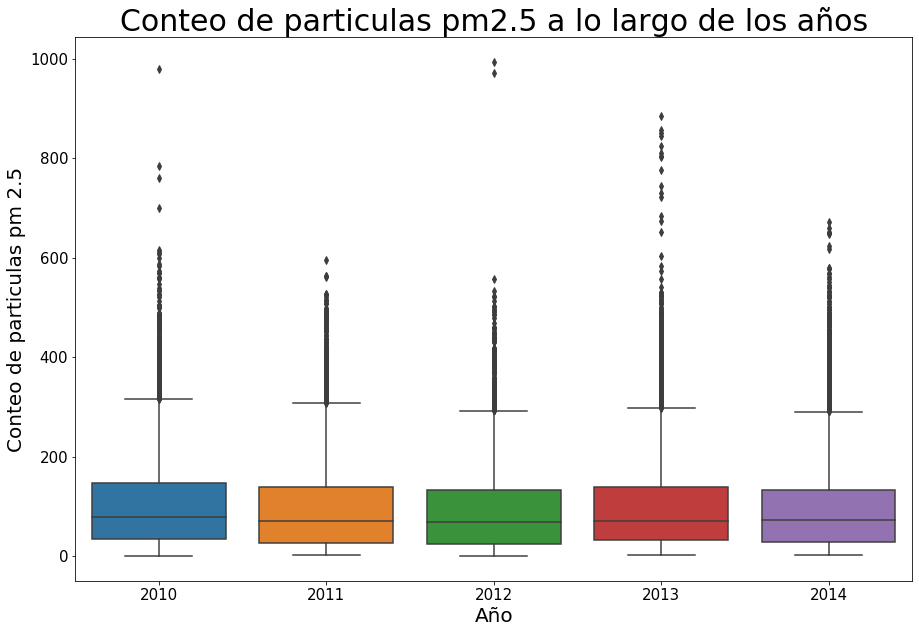

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
b = sns.boxplot(x="year", y="pm2.5", data=data)
b.axes.set_title("Conteo de particulas pm2.5 a lo largo de los años",fontsize=30)
b.set_xlabel("Año",fontsize=20)
b.set_ylabel("Conteo de particulas pm 2.5",fontsize=20)
b.tick_params(labelsize=15)




## 4. Realice un gráfico de disperción de las variables "pm2.5" y "TEMP" con título, labels apropiados y color rojo para los datos. Describa: ¿Qué se puede inferir de dicho gráfico?

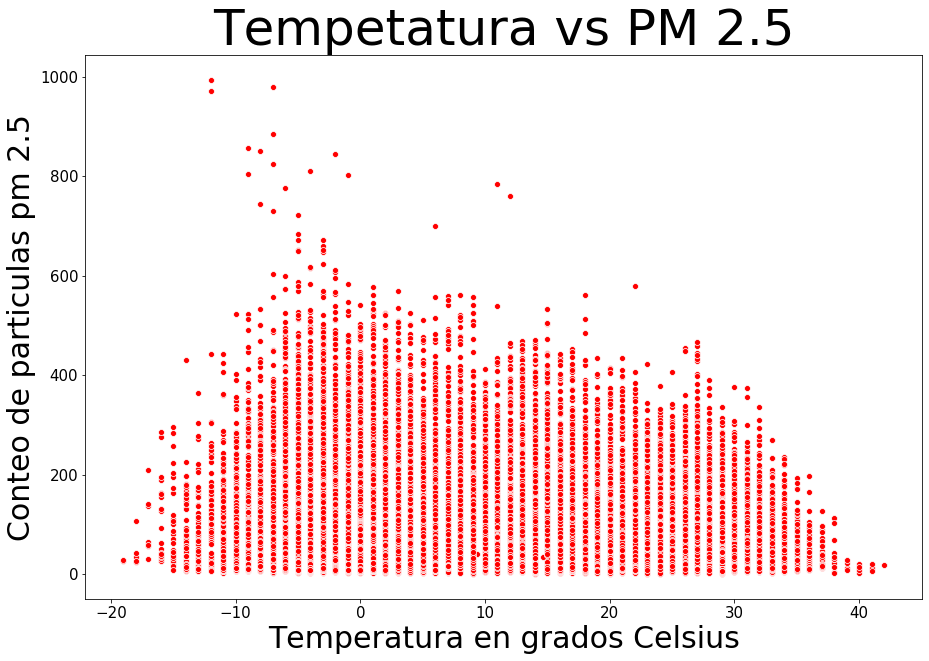

In [95]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
b = sns.scatterplot(data=data, x="TEMP", y="pm2.5", color='red')
b.axes.set_title("Tempetatura vs PM 2.5",fontsize=50)
b.set_xlabel("Temperatura en grados Celsius",fontsize=30)
b.set_ylabel("Conteo de particulas pm 2.5",fontsize=30)
b.tick_params(labelsize=15)

De la grafica anterior se puede concluir que se presenta un mayor conteo de particulas PM 2.5 en temperaturas bajas, entre los 10 a -10 grados celsius, y que entre mayor temperatura la concentración de particulas es menor.

## 5. Calcule la probabilidad de encontrar en la Base de datos el valor de pm2.5 encima de 120

Text(0, 0.5, 'PM 2.5')

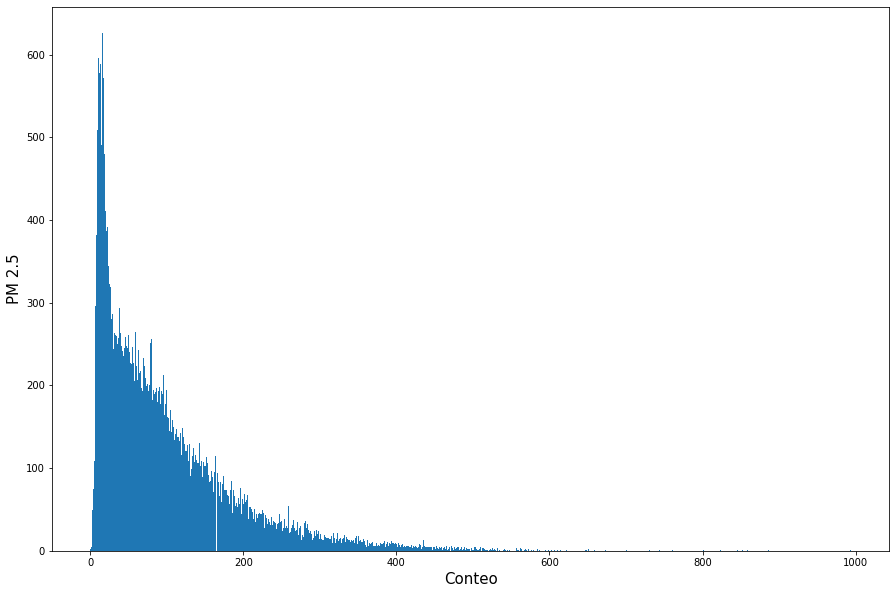

In [106]:
plt.figure(figsize=(15, 10))
data['pm2.5'].hist(bins=1000,grid=False)
plt.xlabel("Conteo", fontsize=15)
plt.ylabel("PM 2.5",fontsize=15)


In [113]:
mayores_a_120 = 0
for index, row in tqdm(data.iterrows()):
    if row['pm2.5'] > 120:
        mayores_a_120 += 1


41757it [00:06, 6011.67it/s]


In [116]:
prob_mayores_120 = mayores_a_120/data.shape[0]
print('La probabilidad de que el valor pm2.5 sea mayor a 120 en el dataset es de: '+ str(prob_mayores_120))


La probabilidad de que el valor pm2.5 sea mayor a 120 en el dataset es de: 0.2989438896472448


## 6. Para finalizar, agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedio.

In [ ]:
data_pm25 = data.groupby(['year']).mean()